In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import statistics as stat
from scipy import stats

## Random Walk

### 1D walk

In [3]:
def walk(n):
    '''Input: n (int): # 0f steps
    Output: x (int): Position of the walker after the walk'''
    init_x = 0
    step_len = 1
    x = init_x
    for i in range(n):
        flag = random.randint(0,1)
        if(flag):
            x+=step_len
        else:
            x-=step_len
    return x

In [4]:
def many_walks(n, m):
    '''
    Input: 
    n (int): # 0f steps
    m (int): # 0f walkers
    Output: 
    walker_x (list): Position of the walkers after the walk
    '''
    walkers_x = np.zeros(m)
    for i in range(m):
        walkers_x[i] = walk(n)
    return walkers_x

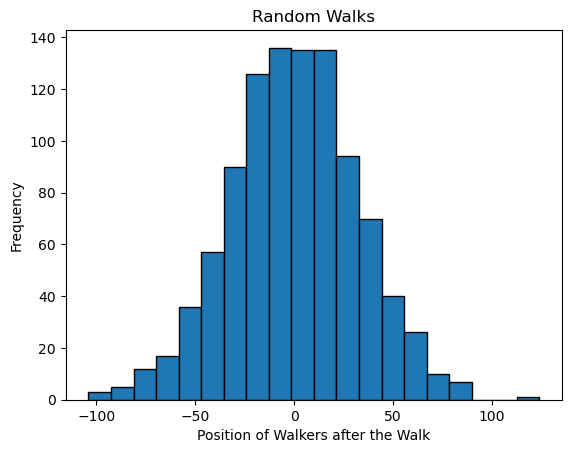

In [10]:
walkers_x= many_walks(1000,1000)
plt.hist(walkers_x, bins=20, edgecolor='black')
plt.xlabel('Position of Walkers after the Walk')
plt.ylabel('Frequency')
plt.title('Random Walks')
plt.show()

In [5]:
steps = np.arange(10,1000,10)
dis_sq = []
for i in range(len(steps)):
    x = many_walks(steps[i], 1000)
    dis_sq.append(np.mean(x**2))

Text(0.5, 1.0, '1D Random Walk (# of steps = 1000, # of walkers = 1000, step length = 1)')

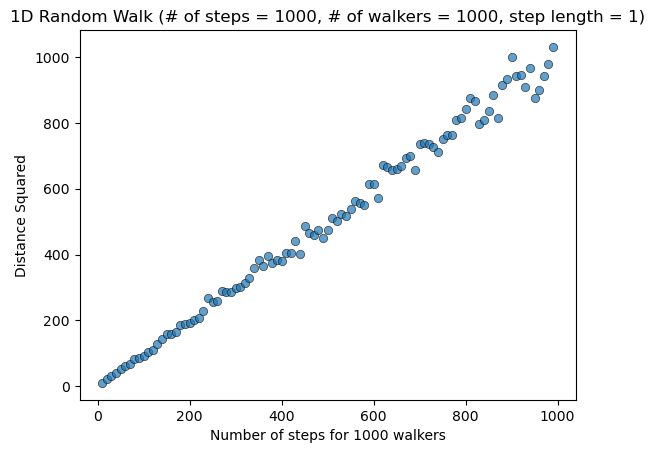

In [6]:
plt.scatter(steps, dis_sq, alpha=0.7,edgecolor='black',linewidths=0.5)
plt.xlabel("Number of steps for 1000 walkers")
plt.ylabel("Distance Squared") 
plt.title("1D Random Walk (# of steps = 1000, # of walkers = 1000, step length = 1)")

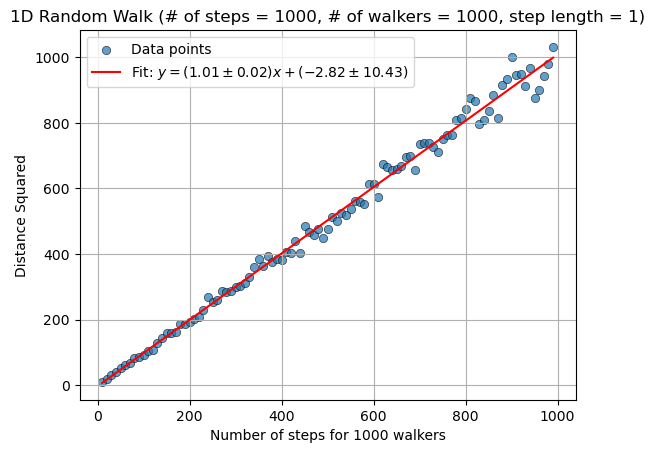

Slope (m): 1.0115 ± 0.0181 (95% CI)
Intercept (b): -2.8163 ± 10.4320 (95% CI)
Standard Error of the Estimate (SEE): 25.9512


In [7]:
# Perform linear regression (y = mx + b)
coefficients, cov_matrix = np.polyfit(steps, dis_sq, 1, cov=True)  # Enable covariance matrix
m, b = coefficients  # m = slope, b = intercept

# Calculate standard errors for slope (m) and intercept (b)
n = len(steps)  # Number of data points
se_m = np.sqrt(cov_matrix[0, 0])  # Standard error of slope
se_b = np.sqrt(cov_matrix[1, 1])  # Standard error of intercept

# Generate fitted line
y_fit = m * steps + b

# Calculate R-squared (goodness of fit)
residuals = dis_sq - y_fit
ss_res = np.sum(residuals**2)
#ss_tot = np.sum((d_sq_mean - np.mean(d_sq_mean))**2)
#r_squared = 1 - (ss_res / ss_tot)

# Calculate Standard Error of the Estimate (SEE)
dof = n - 2  # Degrees of freedom (for linear regression)
see = np.sqrt(ss_res / dof)

# Calculate 95% confidence intervals for slope and intercept
t_value = stats.t.ppf(0.975, dof)  # Two-tailed t-statistic for 95% CI
m_ci = t_value * se_m  # Margin of error for slope
b_ci = t_value * se_b  # Margin of error for intercept

# Plot the data and the fitted line
plt.scatter(steps, dis_sq, alpha=0.7, edgecolor='black', linewidths=0.5, label='Data points')
plt.xlabel("Number of steps for 1000 walkers")
plt.ylabel("Distance Squared") 
plt.title("1D Random Walk (# of steps = 1000, # of walkers = 1000, step length = 1)")

# Plot the regression line with equation and uncertainty
plt.plot(steps, y_fit, color='red', 
         label=f'Fit: $y = ({m:.2f} \pm {m_ci:.2f})x + ({b:.2f} \pm {b_ci:.2f})$')

# Add uncertainty bands (95% confidence interval for the mean prediction)
#ci = t_value * see * np.sqrt(1/n + (steps - np.mean(steps))**2 / np.sum((steps - np.mean(steps))**2))
#plt.fill_between(steps, y_fit - ci, y_fit + ci, color='red', alpha=0.2, label='95% Confidence Band')

plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Slope (m): {m:.4f} ± {m_ci:.4f} (95% CI)")
print(f"Intercept (b): {b:.4f} ± {b_ci:.4f} (95% CI)")
print(f"Standard Error of the Estimate (SEE): {see:.4f}")

### 2D walk

In [13]:
def walk2d(n):
    init_x = 0
    init_y = 0
    step_len = 1
    x = init_x
    y = init_y
    for i in range(n):
        flag = random.randint(0,3)
        if(flag==0):
            x+=step_len
        elif(flag==1):
            x-=step_len
        elif(flag==2):
            y+=step_len
        else:
            y-=step_len
    return x,y

In [14]:
def many_walks2d(n, m):
    '''
    Input: 
    n (int): # 0f steps
    m (int): # 0f walkers
    Output: 
    walker_x (list): x Position of the walkers after the walk
    walker_y (list): y Position of the walkers after the walk
    '''
    walker_x = np.zeros(m)
    walker_y = np.zeros(m)
    for i in range(m):
        x,y = walk2d(n)
        walker_x[i] = x
        walker_y[i] = y
    return walker_x, walker_y

Text(0.5, 1.0, '2D Random Walk')

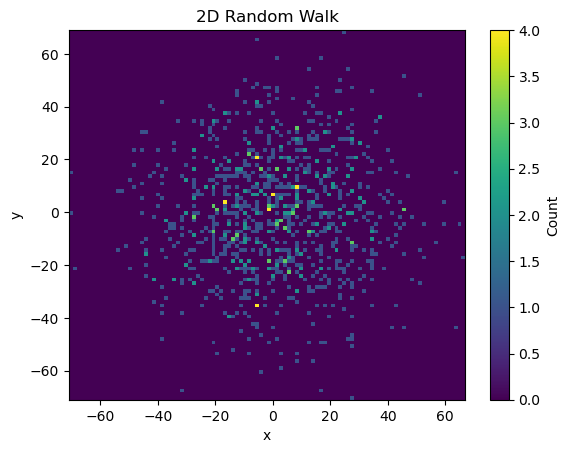

In [56]:
x, y = many_walks2d(1000,1000)
plt.hist2d(x,y, bins=100, cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Random Walk')

Text(0.5, 1.0, '2D Random Walk')

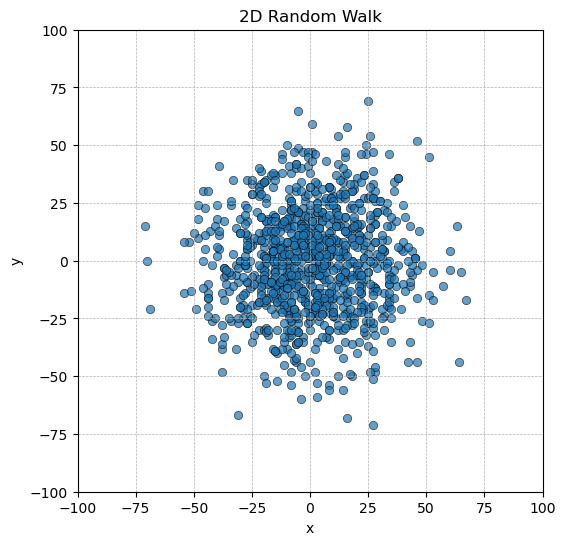

In [60]:
plt.figure(figsize=(6,6))
plt.grid(True, linestyle='--', linewidth=0.5)
plt.scatter(x,y,alpha=0.7,edgecolor='black',linewidths=0.5)
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Random Walk')

Text(0.5, 1.0, '2D Random Walk for 1000 walkers')

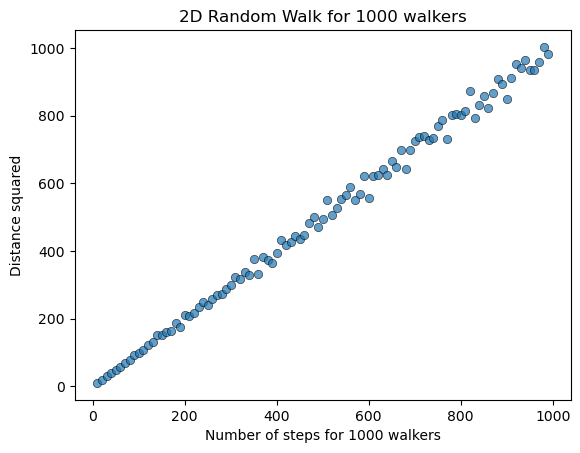

In [9]:
steps = np.arange(10,1000,10)
d_sq_mean = []
for i in range(len(steps)):
    x, y = many_walks2d(steps[i], 1000)
    d_sq = x**2+y**2
    d_sq_mean.append(stat.mean(d_sq))
plt.scatter(steps, d_sq_mean, alpha=0.7,edgecolor='black',linewidths=0.5)
plt.xlabel("Number of steps for 1000 walkers")
plt.ylabel("Distance squared") 
plt.title("2D Random Walk for 1000 walkers") 

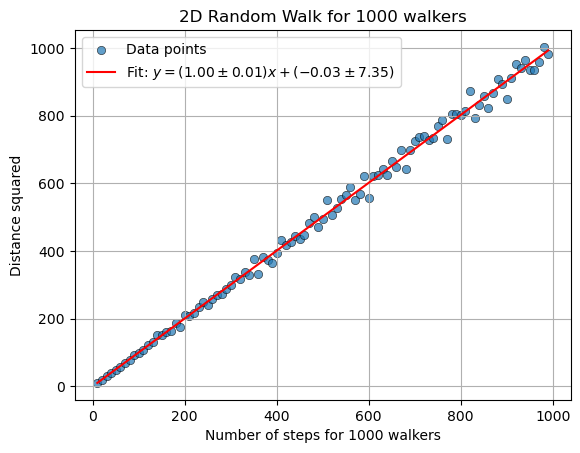

Slope (m): 1.0027 ± 0.0128 (95% CI)
Intercept (b): -0.0349 ± 7.3493 (95% CI)
Standard Error of the Estimate (SEE): 18.2826


In [ ]:
# Perform linear regression (y = mx + b)
coefficients, cov_matrix = np.polyfit(steps, d_sq_mean, 1, cov=True)  # Enable covariance matrix
m, b = coefficients  # m = slope, b = intercept

# Calculate standard errors for slope (m) and intercept (b)
n = len(steps)  # Number of data points
se_m = np.sqrt(cov_matrix[0, 0])  # Standard error of slope
se_b = np.sqrt(cov_matrix[1, 1])  # Standard error of intercept

# Generate fitted line
y_fit = m * steps + b

# Calculate R-squared (goodness of fit)
residuals = d_sq_mean - y_fit
ss_res = np.sum(residuals**2)
#ss_tot = np.sum((d_sq_mean - np.mean(d_sq_mean))**2)
#r_squared = 1 - (ss_res / ss_tot)

# Calculate Standard Error of the Estimate (SEE)
dof = n - 2  # Degrees of freedom (for linear regression)
see = np.sqrt(ss_res / dof)

# Calculate 95% confidence intervals for slope and intercept
t_value = stats.t.ppf(0.975, dof)  # Two-tailed t-statistic for 95% CI
m_ci = t_value * se_m  # Margin of error for slope
b_ci = t_value * se_b  # Margin of error for intercept

# Plot the data and the fitted line
plt.scatter(steps, d_sq_mean, alpha=0.7, edgecolor='black', linewidths=0.5, label='Data points')
plt.xlabel("Number of steps for 1000 walkers")
plt.ylabel("Distance squared") 
plt.title("2D Random Walk for 1000 walkers") 

# Plot the regression line with equation and uncertainty
plt.plot(steps, y_fit, color='red', 
         label=f'Fit: $y = ({m:.2f} \pm {m_ci:.2f})x + ({b:.2f} \pm {b_ci:.2f})$')

# Add uncertainty bands (95% confidence interval for the mean prediction)
#ci = t_value * see * np.sqrt(1/n + (steps - np.mean(steps))**2 / np.sum((steps - np.mean(steps))**2))
#plt.fill_between(steps, y_fit - ci, y_fit + ci, color='red', alpha=0.2, label='95% Confidence Band')

plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Slope (m): {m:.4f} ± {m_ci:.4f} (95% CI)")
print(f"Intercept (b): {b:.4f} ± {b_ci:.4f} (95% CI)")
print(f"Standard Error of the Estimate (SEE): {see:.4f}")

## 3D Random Walk

In [23]:
def walk3d(n):
    '''Input: n (int): # 0f steps'''
    init_x = 0
    init_y = 0
    init_z = 0
    step_len = 1
    x = init_x
    y = init_y
    z = init_z

    for i in range(n):
        flag = random.randint(0,5)
        if(flag==0):
            x+=step_len
        elif(flag==1):
            x-=step_len
        elif(flag==2):
            y+=step_len
        elif(flag==3):
            y-=step_len
        elif(flag==4):
            z+=step_len
        else:
            z-=step_len
    return x,y,z

def many_walks3d(n, m):
    '''
    Input: 
    n (int): # 0f steps
    m (int): # 0f walkers
    Output: 
    walker_x (list): x Position of the walkers after the walk
    walker_y (list): y Position of the walkers after the walk
    walker_z (list): z Position of the walkers after the walk
    '''
    walker_x = np.zeros(m)
    walker_y = np.zeros(m)
    walker_z = np.zeros(m)
    for i in range(m):
        x,y,z = walk3d(n)
        walker_x[i] = x
        walker_y[i] = y
        walker_z[i] = z
    return walker_x, walker_y, walker_z

In [24]:
steps = np.arange(10,1000,10)
d_sq_mean = []
for i in range(len(steps)):
    x, y, z = many_walks3d(steps[i], 1000)
    d_sq = x**2+y**2+z**2
    d_sq_mean.append(stat.mean(d_sq))

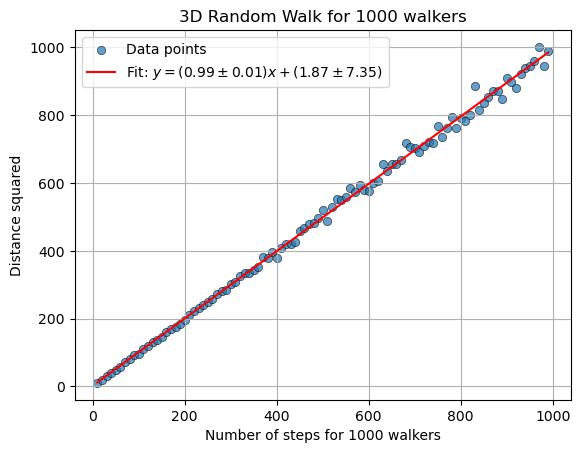

Slope (m): 0.9934 ± 0.0128 (95% CI)
Intercept (b): 1.8740 ± 7.3493 (95% CI)
Standard Error of the Estimate (SEE): 18.2826


In [25]:
# Perform linear regression (y = mx + b)
coefficients, cov_matrix = np.polyfit(steps, d_sq_mean, 1, cov=True)  # Enable covariance matrix
m, b = coefficients  # m = slope, b = intercept

# Calculate standard errors for slope (m) and intercept (b)
n = len(steps)  # Number of data points
se_m = np.sqrt(cov_matrix[0, 0])  # Standard error of slope
se_b = np.sqrt(cov_matrix[1, 1])  # Standard error of intercept

# Generate fitted line
y_fit = m * steps + b

# Calculate Standard Error of the Estimate (SEE)
dof = n - 2  # Degrees of freedom (for linear regression)
see = np.sqrt(ss_res / dof)

# Plot the data and the fitted line
plt.scatter(steps, d_sq_mean, alpha=0.7, edgecolor='black', linewidths=0.5, label='Data points')
plt.xlabel("Number of steps for 1000 walkers")
plt.ylabel("Distance squared") 
plt.title("3D Random Walk for 1000 walkers") 

# Plot the regression line with equation and uncertainty
plt.plot(steps, y_fit, color='red', 
         label=f'Fit: $y = ({m:.2f} \pm {m_ci:.2f})x + ({b:.2f} \pm {b_ci:.2f})$')

plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Slope (m): {m:.4f} ± {m_ci:.4f} (95% CI)")
print(f"Intercept (b): {b:.4f} ± {b_ci:.4f} (95% CI)")
print(f"Standard Error of the Estimate (SEE): {see:.4f}")

### Biased Random Walk

In [41]:
def biasedWalk2d(n):
    init_x = 0
    init_y = 0
    step_len = 1
    x = init_x
    y = init_y
    for i in range(n):
        flag = random.randint(0,4)
        if(flag==0 or flag==4):
            x+=step_len
        elif(flag==1):
            x-=step_len
        elif(flag==2):
            y+=step_len
        elif(flag==3):
            y-=step_len
    return x,y
def biased_many_walks2d(n, m):
    '''
    Input: 
    n (int): # 0f steps
    m (int): # 0f walkers
    Output: 
    walker_x (list): x Position of the walkers after the walk
    walker_y (list): y Position of the walkers after the walk
    '''
    walker_x = np.zeros(m)
    walker_y = np.zeros(m)
    for i in range(m):
        x,y = biasedWalk2d(n)
        walker_x[i] = x
        walker_y[i] = y
    return walker_x, walker_y

In [42]:
x, y = biased_many_walks2d(1000,1000)

Text(0.5, 1.0, '2D Random Walk')

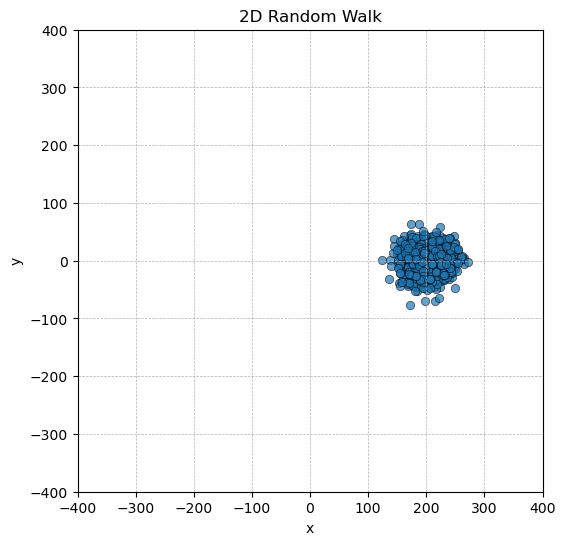

In [53]:
plt.figure(figsize=(6,6))
plt.grid(True, linestyle='--', linewidth=0.5)
plt.scatter(x,y,alpha=0.7,edgecolor='black',linewidths=0.5)
plt.xlim(-400,400)
plt.ylim(-400,400)
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Random Walk')